In [ ]:
fimport numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape)

(60000, 28, 28)


In [ ]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
print(train_scaled.shape)

(60000, 28, 28, 1)


In [ ]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 28, 28, 1) (48000,)


In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28,28,1)))

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [ ]:
keras.utils.plot_model(model)

In [ ]:
keras.utils.plot_model(model, show_shapes=True, to_file = 'cnn-architecture.png', dpi = 300)

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 39s 7ms/step - loss: 0.5114 - accuracy: 0.8169 - val_loss: 0.3612 - val_accuracy: 0.8661
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3423 - accuracy: 0.8792 - val_loss: 0.2737 - val_accuracy: 0.9010
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2893 - accuracy: 0.8954 - val_loss: 0.2603 - val_accuracy: 0.9027
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2593 - accuracy: 0.9071 - val_loss: 0.2568 - val_accuracy: 0.9016
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2319 - accuracy: 0.9156 - val_loss: 0.2349 - val_accuracy: 0.9128
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2148 - accuracy: 0.9210 - val_loss: 0.2209 - val_accuracy: 0.9184
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1964 - accuracy: 0.9271 - val_loss: 0.2142 - val_accuracy

In [ ]:
import matplotlib.pyplot as plt

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fe7536f64d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


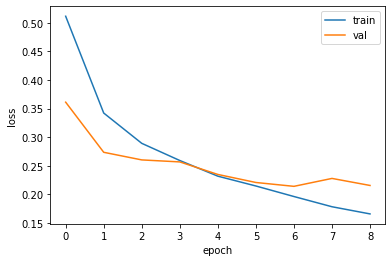

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2142 - accuracy: 0.9205


[0.21416227519512177, 0.9204999804496765]

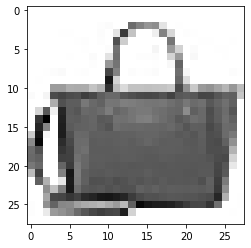

In [ ]:
plt.imshow(val_scaled[0].reshape(28,28), cmap = 'gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.09333524e-16 5.15113518e-23 1.11565975e-18 2.77873288e-16
  9.14918297e-16 1.12610225e-16 1.03695230e-14 4.58359333e-16
  1.00000000e+00 4.72020459e-17]]


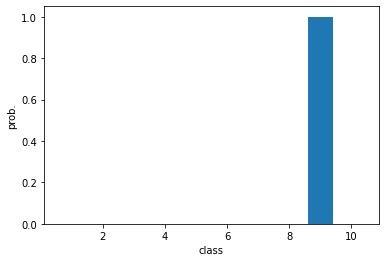

In [ ]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵글 부츠']

In [ ]:
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2450 - accuracy: 0.9139


[0.24504616856575012, 0.9139000177383423]

In [ ]:
model = keras.models.load_model("best-cnn-model.h5")

In [ ]:
model.layers

In [ ]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.050683286 0.2844485


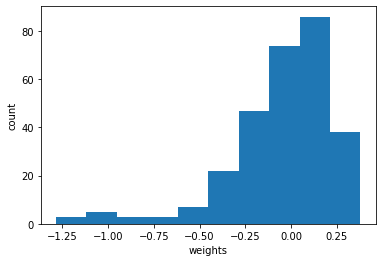

In [ ]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

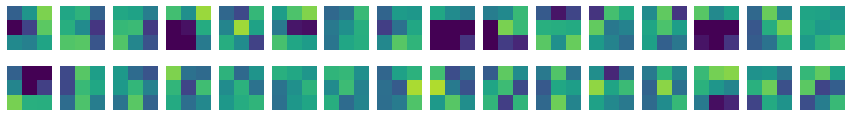

In [ ]:
fig, axs = plt.subplots(2, 16, figsize = (15,2))

for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')

plt.show()

In [ ]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28,28,1)))

In [ ]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

0.004463662 0.084568776


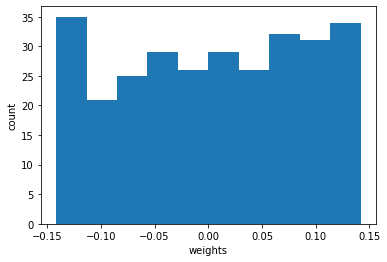

In [ ]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

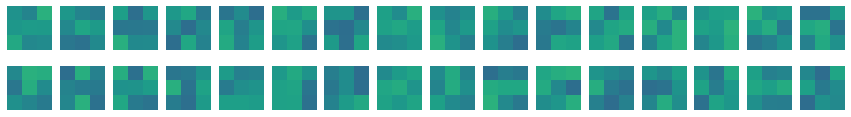

In [ ]:
fig, axs = plt.subplots(2, 16, figsize = (15,2))

for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin = -0.5, vmax = 0.5)
    axs[i, j].axis('off')

plt.show()